In [73]:
from sklearnex.linear_model import LinearRegression
from sklearnex.ensemble import RandomForestClassifier
from sklearnex.linear_model import LogisticRegression
from sklearnex.ensemble import RandomForestRegressor

In [34]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
Water_surface = (0,1,2) 
Flooding = (0.0,0.1,0.3)
Moderate_drought = (0,-1,-2)
Drought = (0.0,-0.1,-0.2) 

In [24]:
data = {
    'Water_surface': Water_surface,
    'Flooding': Flooding,
    'Moderate_drought': Moderate_drought,
    'Drought': Drought
}

df = pd.DataFrame(data)

print(df)

   Water_surface  Flooding  Moderate_drought  Drought
0              0       0.0                 0      0.0
1              1       0.1                -1     -0.1
2              2       0.3                -2     -0.2


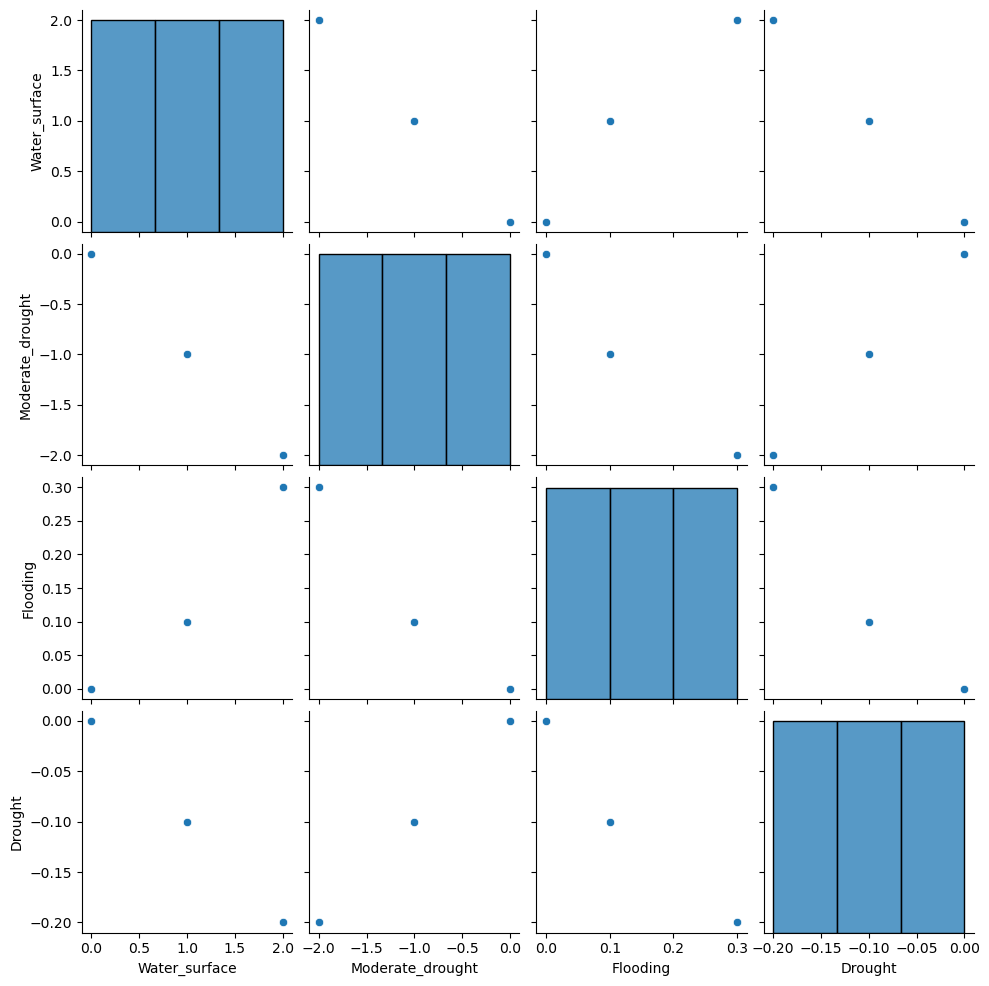

In [27]:
x = 'Water_surface'
y = 'Flooding'
x1 = 'Moderate_drought'
y1 = 'Drought'

# Assuming you have a DataFrame named df containing data for x and y
sns.pairplot(df[[x,x1,y,y1]])


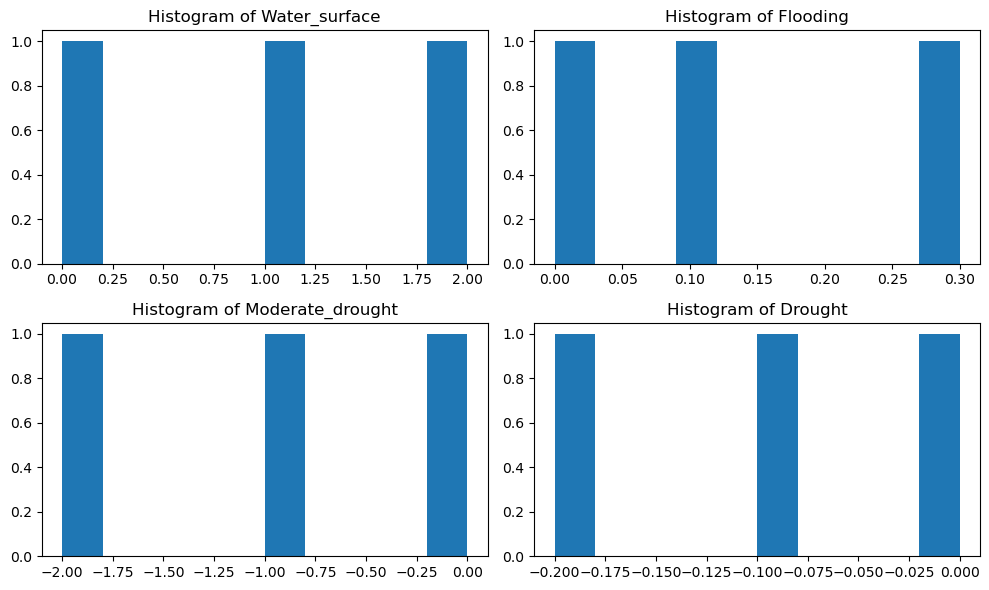

In [29]:
# Plot histograms for Water_surface and Flooding
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(df['Water_surface'])
plt.title('Histogram of Water_surface')

plt.subplot(2, 2, 2)
plt.hist(df['Flooding'])
plt.title('Histogram of Flooding')

# Plot histograms for Moderate_drought and Drought
plt.subplot(2, 2, 3)
plt.hist(df['Moderate_drought'])
plt.title('Histogram of Moderate_drought')

plt.subplot(2, 2, 4)
plt.hist(df['Drought'])
plt.title('Histogram of Drought')

plt.tight_layout()
plt.show()


In [32]:
# Define features (X) and target variable (y)
X = df[['Water_surface', 'Moderate_drought']]  # Features
y = df['Flooding']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.009999999999999962


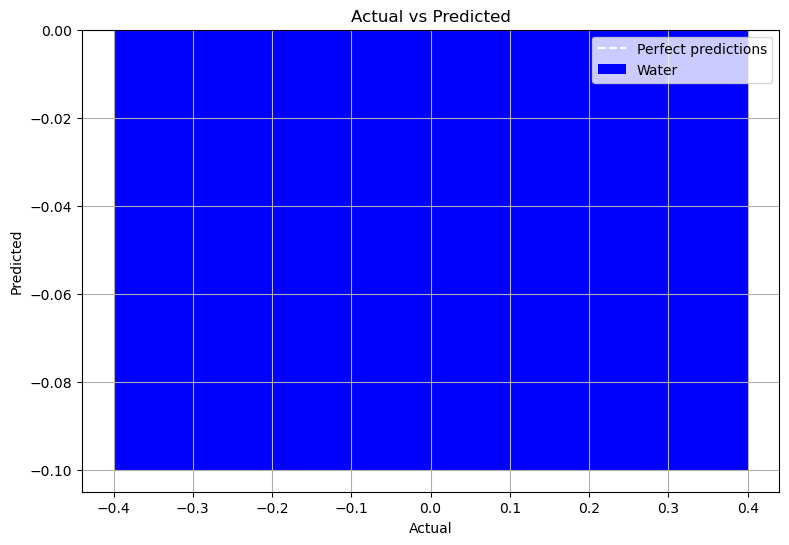

In [53]:
plt.figure(figsize=(9, 6))
plt.bar(y_test, y_pred, color='blue', label='Water')
plt.plot(y_test, y_test, color='white', linestyle='--',label='Perfect predictions')  
# Plotting the line of perfect predictions (y_test = y_pred)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()

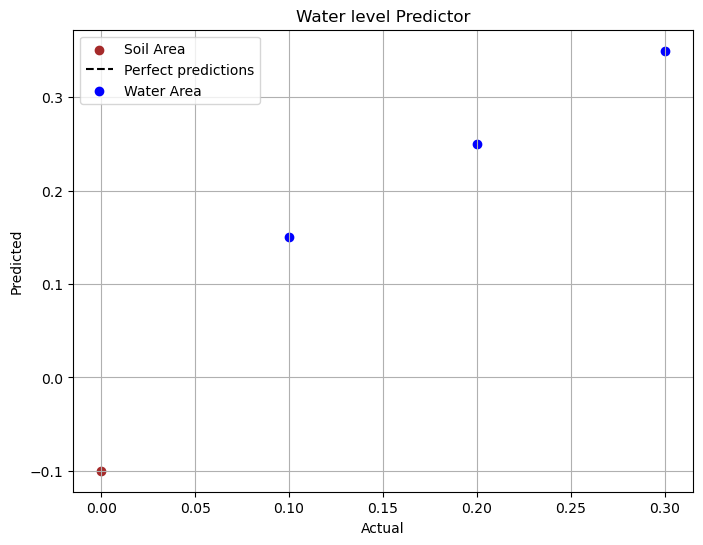

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='brown', label='Soil Area')
plt.plot(y_test, y_test, color='black', linestyle='--', label='Perfect predictions') 

# Add more points to the scatter plot (example points)
plt.scatter([0.1, 0.2, 0.3], [0.15, 0.25, 0.35], color='blue', label='Water Area')

plt.title('Water level Predictor')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.legend()
plt.show()

In [60]:
# Assume threshold values for indicating different conditions
flooding_threshold = 0.2  # Example threshold for flooding
drought_threshold = -0.15  # Example threshold for drought

# Predict if flooding is over, water surface is detected, or drought is over based on the predictions
for pred in y_pred:
    if pred >= flooding_threshold:
        print("Flooding is over")
    elif pred <= drought_threshold:
        print("Drought is over")
    else:
        print("Water surface is good")


Water surface is good


In [61]:
# Assume threshold values for indicating different conditions
flooding_threshold = 0.1  # Example threshold for flooding
drought_threshold = -0.0  # Example threshold for drought

# Predict if flooding is over, water surface is detected, or drought is over based on the predictions
for pred in y_pred:
    if pred >= flooding_threshold:
        print("Flooding is over")
    elif pred <= drought_threshold:
        print("Drought is over")
    else:
        print("Water surface is good")


Drought is over


In [55]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you can use X_train and y_train to fit your classifier

In [74]:
import joblib

# Assuming 'model' is the variable containing your trained model

# Save the trained model to a file
pkl_file = "Surface_Water_level_detector.pkl"
joblib.dump(model, model_file)

print(f"Model saved to {model_file}")


Model saved to Surface_Water_level_detector
